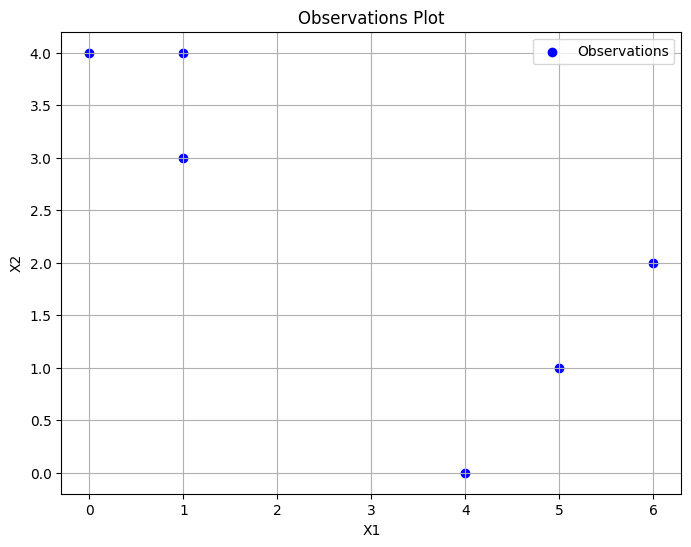

Initial Cluster Labels: [0 1 0 0 0 1]

Initial Cluster Assignments:
Observation 1 (X1: 1, X2: 4) -> Cluster 0
Observation 2 (X1: 1, X2: 3) -> Cluster 1
Observation 3 (X1: 0, X2: 4) -> Cluster 0
Observation 4 (X1: 5, X2: 1) -> Cluster 0
Observation 5 (X1: 6, X2: 2) -> Cluster 0
Observation 6 (X1: 4, X2: 0) -> Cluster 1

Initial Centroids:
 [[3.   2.75]
 [2.5  1.5 ]]

Iteration 1:
Centroids:
 [[3.   2.75]
 [2.5  1.5 ]]
Cluster Assignments:
Observation 1 (X1: 1, X2: 4) -> Cluster 0
Observation 2 (X1: 1, X2: 3) -> Cluster 0
Observation 3 (X1: 0, X2: 4) -> Cluster 0
Observation 4 (X1: 5, X2: 1) -> Cluster 1
Observation 5 (X1: 6, X2: 2) -> Cluster 0
Observation 6 (X1: 4, X2: 0) -> Cluster 1

Iteration 2:
Centroids:
 [[2.   3.25]
 [4.5  0.5 ]]
Cluster Assignments:
Observation 1 (X1: 1, X2: 4) -> Cluster 0
Observation 2 (X1: 1, X2: 3) -> Cluster 0
Observation 3 (X1: 0, X2: 4) -> Cluster 0
Observation 4 (X1: 5, X2: 1) -> Cluster 1
Observation 5 (X1: 6, X2: 2) -> Cluster 1
Observation 6 (X1: 4, 

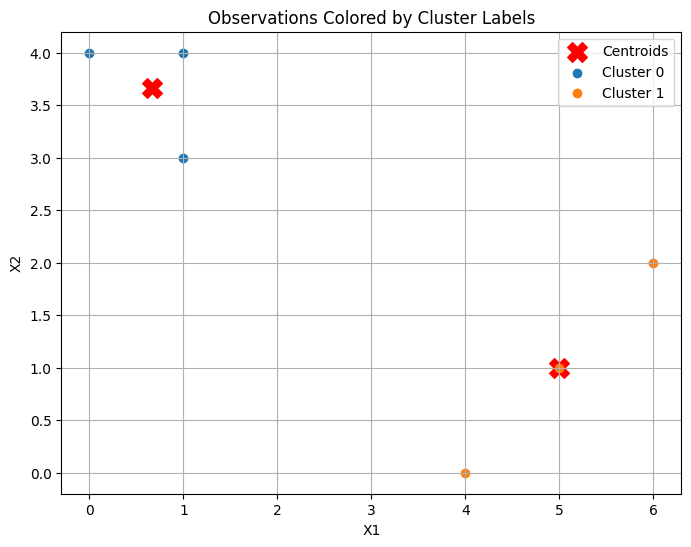

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Define the observations
observations = np.array([[1, 4],
                          [1, 3],
                          [0, 4],
                          [5, 1],
                          [6, 2],
                          [4, 0]])

# Plot the observations
plt.figure(figsize=(8, 6))
plt.scatter(observations[:, 0], observations[:, 1], color='blue', label='Observations')
plt.title('Observations Plot')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.legend()
plt.show()

# (b) Randomly assign initial cluster labels
np.random.seed(42)  # For reproducibility
initial_labels = np.random.choice([0, 1], size=observations.shape[0])
print("Initial Cluster Labels:", initial_labels)

# Print initial cluster assignments with observation locations
print("\nInitial Cluster Assignments:")
for obs_idx, cluster in enumerate(initial_labels):
    print(f"Observation {obs_idx + 1} (X1: {observations[obs_idx, 0]}, X2: {observations[obs_idx, 1]}) -> Cluster {cluster}")

def compute_centroids(obs, labels):
    centroids = []
    for k in np.unique(labels):
        centroids.append(obs[labels == k].mean(axis=0))
    return np.array(centroids)

# (c) Compute the initial centroids
centroids = compute_centroids(observations, initial_labels)
print("\nInitial Centroids:\n", centroids)

def assign_clusters(obs, centroids):
    distances = np.linalg.norm(obs[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

previous_labels = initial_labels
iteration = 0

while True:
    # (d) Assign observations to the closest centroid
    new_labels = assign_clusters(observations, centroids)

    print(f"\nIteration {iteration + 1}:")
    print("Centroids:\n", centroids)
    print("Cluster Assignments:")
    for obs_idx, cluster in enumerate(new_labels):
        print(f"Observation {obs_idx + 1} (X1: {observations[obs_idx, 0]}, X2: {observations[obs_idx, 1]}) -> Cluster {cluster}")

    # (e) Compute new centroids
    centroids = compute_centroids(observations, new_labels)

    # Check for convergence
    if np.array_equal(new_labels, previous_labels):
        break
    previous_labels = new_labels
    iteration += 1

# Print final cluster assignments
print("\nFinal Cluster Assignments:")
for obs_idx, cluster in enumerate(new_labels):
    print(f"Observation {obs_idx + 1} (X1: {observations[obs_idx, 0]}, X2: {observations[obs_idx, 1]}) -> Cluster {cluster}")

print("\nFinal Centroids:\n", centroids)

# (f) Plot the observations with colors according to the final cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
for k in np.unique(new_labels):
    plt.scatter(observations[new_labels == k, 0], observations[new_labels == k, 1], label=f'Cluster {k}')
plt.title('Observations Colored by Cluster Labels')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.legend()
plt.show()
